In [1]:
# import glob
# [_.split('/')[-1] for _ in glob.glob('../*.txt')]

In [2]:
import glob
import pandas as pd
import pickle
import sys
import os
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
import lynne_pp as lpp
from tqdm import tqdm, trange

# gdat = pickle.load(open('../../model_outputs/ssave/77_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_cvsize=.05_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_cvsize=.01_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/w_unrewarded_cvsize=.01_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv2_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv2_maxiter10k_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv_shuffle_kwargs_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne2_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_purel1l2_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_w_dummy_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))




In [3]:
# prefix = 'new_lynne_linear_only_refac'
# prefix = 'new_lynne_minl2_only_refac'
# prefix = 'investig_resolved'
# prefix = 'r_trial-r-refit'
# prefix = 'r_concat2'
# prefix = 'allsess_fit_multi_alpha'
prefix = 'manysess_individ-nohyp'
gdat_dct = {}

for fn in sorted(glob.glob(f'../../model_outputs/ssave/{prefix}*.pkl')):
    gdat_dct[fn] = pickle.load(open(fn, 'rb'))

In [4]:
# gdat_lst[0].data.keys()

In [5]:
# bd = gdat_lst[0].data['basedata']
# # bd['wi_trial_keep']
# # bd

In [6]:
# bd[bd['wi_trial_keep']]

In [7]:
# gdat.data.keys()

In [8]:
# gdat_lst[0].data['X_cols']

In [9]:
col_names = ['fn', 'response', 'dropped', 'alpha', 'l1_ratio', 'tr_witi', 'tr_noiti', 'gss_witi', 'gss_noiti', 'holdout_witi', 'holdout_noiti']
df = pd.DataFrame(columns=col_names)

for gdat_key in gdat_dct:
    gdat = gdat_dct[gdat_key]
    for fr in gdat.data['fit_results']:
        print(fr.keys())
        dc = fr['dropped_cols']
        rc = fr['response_col']
        hp = fr['hyperparams']
        scores = fr['scores']
        # print(fr.keys())
        print('response_col:', rc, '— dropped_cols', dc, '— hyperparams', hp)
        for sc in scores:
            if scores[sc] is not None:
                print('>', sc, scores[sc])
        
        df = df.append(pd.DataFrame([[gdat.data['filename'], rc, dc, hp['alpha'], hp['l1_ratio'], scores['tr_witi'], scores['tr_noiti'], scores['gss_witi'], scores['gss_noiti'], scores['holdout_witi'], scores['holdout_noiti']]], columns=col_names))

dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: resp1 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.0, 'l1_ratio': 0}
> tr_witi 0.06435160683307439
> tr_noiti 0.11025147050011797
> gss_witi 0.04684038246809297
> holdout_witi 0.08228696371603372
> holdout_noiti 0.11151021518696869
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: resp2 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.0, 'l1_ratio': 0}
> tr_witi 0.1328183801830306
> tr_noiti 0.23809765632949142
> gss_witi 0.11530147793724732
> holdout_witi 0.1469773759552111
> holdout_noiti 0.2520224741874778
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: resp3 — dropped_cols [] — hyperparams {'max_iter': 1000, 

In [10]:
# num_view = 5
# display(df.query("response == 'zsgdFF'").sort_values('holdout_noiti').iloc[-num_view:])
# display(df.query("response == 'zsgdFF'").sort_values('holdout_witi').iloc[-num_view:])
# display(df.query("response == 'zsgdFF'").sort_values('gss_witi').iloc[-num_view:])

# display(df.query("response == 'zsrdFF'").sort_values('holdout_noiti').iloc[-num_view:])
# display(df.query("response == 'zsrdFF'").sort_values('holdout_witi').iloc[-num_view:])
# display(df.query("response == 'zsrdFF'").sort_values('gss_witi').iloc[-num_view:])

In [25]:
with pd.option_context('max_rows',1000):
    # display(df.sort_values(['fn', 'holdout_noiti'], ascending=False))
    display(df.sort_values(['response', 'fn'], ascending=[True, True]).set_index(['response', 'fn']))
    # display(df.sort_values(['response', 'holdout_noiti'], ascending=False))


dropped  alpha l1_ratio   tr_witi  \
response fn                                                                
resp1    GLM_SIGNALS_WT43_03192021.txt      []    0.0        0  0.064352   
         GLM_SIGNALS_WT43_03232021.txt      []    0.0        0  0.061827   
         GLM_SIGNALS_WT43_03262021.txt      []    0.0        0  0.062056   
         GLM_SIGNALS_WT44_03162021.txt      []    0.0        0  0.064033   
         GLM_SIGNALS_WT44_03192021.txt      []    0.0        0  0.063206   
         GLM_SIGNALS_WT44_03232021.txt      []    0.0        0  0.070456   
         GLM_SIGNALS_WT44_03262021.txt      []    0.0        0  0.069165   
         GLM_SIGNALS_WT61_10042021.txt      []    0.0        0  0.289159   
         GLM_SIGNALS_WT61_10062021.txt      []    0.0        0  0.308791   
         GLM_SIGNALS_WT61_10082021.txt      []    0.0        0  0.292230   
         GLM_SIGNALS_WT61_10112021.txt      []    0.0        0  0.309502   
         GLM_SIGNALS_WT61_10132021.txt      []    0.0        0  0.301515   
         GLM_SIGNALS_WT61_10152021.txt      []    0.0        0  0.284995   
         GLM_SIGNALS_WT61_10182021.txt      []    0.0        0  0.287623   
         GLM_SIGNALS_WT63_11082021.txt      []    0.0        0  0.238621   
         GLM_SIGNALS_WT63_11102021.txt      []    0.0        0  0.309314   
         GLM_SIGNALS_WT63_11122021.txt      []    0.0        0  0.335086   
         GLM_SIGNALS_WT63_11162021.txt      []    0.0        0  0.289451   
         GLM_SIGNALS_WT63_11182021.txt      []    0.0        0  0.309184   
         GLM_SIGNALS_WT63_11222021.txt      []    0.0        0  0.226995   
         GLM_SIGNALS_WT64_11082021.txt      []    0.0        0  0.251446   
         GLM_SIGNALS_WT64_11102021.txt      []    0.0        0  0.214191   
         GLM_SIGNALS_WT64_11122021.txt      []    0.0        0  0.199863   
         GLM_SIGNALS_WT64_11162021.txt      []    0.0        0  0.224999   
         GLM_SIGNALS_WT64_11182021.txt      []    0.0        0  0.209370   
         GLM_SIGNALS_WT64_11222021.txt      []    0.0        0  0.195143   
resp2    GLM_SIGNALS_WT43_03192021.txt      []    0.0        0  0.132818   
         GLM_SIGNALS_WT43_03232021.txt      []    0.0        0  0.139646   
         GLM_SIGNALS_WT43_03262021.txt      []    0.0        0  0.107301   
         GLM_SIGNALS_WT44_03162021.txt      []    0.0        0  0.208738   
         GLM_SIGNALS_WT44_03192021.txt      []    0.0        0  0.210229   
         GLM_SIGNALS_WT44_03232021.txt      []    0.0        0  0.208596   
         GLM_SIGNALS_WT44_03262021.txt      []    0.0        0  0.195379   
         GLM_SIGNALS_WT61_10042021.txt      []    0.0        0  0.162839   
         GLM_SIGNALS_WT61_10062021.txt      []    0.0        0  0.138018   
         GLM_SIGNALS_WT61_10082021.txt      []    0.0        0  0.009804   
         GLM_SIGNALS_WT61_10112021.txt      []    0.0        0  0.122034   
         GLM_SIGNALS_WT61_10132021.txt      []    0.0        0  0.145105   
         GLM_SIGNALS_WT61_10152021.txt      []    0.0        0  0.022251   
         GLM_SIGNALS_WT61_10182021.txt      []    0.0        0  0.061645   
         GLM_SIGNALS_WT63_11082021.txt      []    0.0        0  0.008350   
         GLM_SIGNALS_WT63_11102021.txt      []    0.0        0  0.007576   
         GLM_SIGNALS_WT63_11122021.txt      []    0.0        0  0.012613   
         GLM_SIGNALS_WT63_11162021.txt      []    0.0        0  0.026914   
         GLM_SIGNALS_WT63_11182021.txt      []    0.0        0  0.008003   
         GLM_SIGNALS_WT63_11222021.txt      []    0.0        0  0.006835   
         GLM_SIGNALS_WT64_11082021.txt      []    0.0        0  0.012108   
         GLM_SIGNALS_WT64_11102021.txt      []    0.0        0  0.013078   
         GLM_SIGNALS_WT64_11122021.txt      []    0.0        0  0.035547   
         GLM_SIGNALS_WT64_11162021.txt      []    0.0        0  0.032509   
         GLM_SIGNALS_WT64_11182021.txt      []    0.0        0  0.012128   
         GL

In [12]:
# df['delta'] = df['holdout_witi'] - df['gss_witi']
df['delta'] = df['holdout_witi'].apply(lambda x: x) - df['tr_witi']
df = df[~df['dropped'].astype(str).str.contains('nTrial')]

with pd.option_context('max_rows', 10000):
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'delta'], ascending=[True, True, True, False]))
    display(df.assign(dropped=df['dropped'].astype(str)).set_index(['fn', 'response', 'alpha', 'l1_ratio', 'dropped'])['delta'].unstack(-1).sort_index())


dropped                                                      []
fn                            response alpha l1_ratio          
GLM_SIGNALS_WT43_03192021.txt resp1    0.0   0         0.017935
                              resp2    0.0   0         0.014159
                              resp3    0.0   0        -0.032088
                              resp4    0.0   0        -0.051740
GLM_SIGNALS_WT43_03232021.txt resp1    0.0   0        -0.031712
                              resp2    0.0   0        -0.007210
                              resp3    0.0   0         0.012278
                              resp4    0.0   0        -0.047366
GLM_SIGNALS_WT43_03262021.txt resp1    0.0   0        -0.011509
                              resp2    0.0   0         0.003168
                              resp3    0.0   0         0.034835
                              resp4    0.0   0        -0.006521
GLM_SIGNALS_WT44_03162021.txt resp1    0.0   0        -0.021874
                              resp2    0.0   0         0.037717
                              resp3    0.0   0        -0.024396
                              resp4    0.0   0         0.027723
GLM_SIGNALS_WT44_03192021.txt resp1    0.0   0        -0.004275
                              resp2    0.0   0        -0.022774
                              resp3    0.0   0        -0.022752
                              resp4    0.0   0        -0.016506
GLM_SIGNALS_WT44_03232021.txt resp1    0.0   0        -0.017097
                              resp2    0.0   0        -0.017689
                              resp3    0.0   0        -0.021352
                              resp4    0.0   0        -0.012364
GLM_SIGNALS_WT44_03262021.txt resp1    0.0   0         0.001528
                              resp2    0.0   0        -0.004309
                              resp3    0.0   0         0.010901
                              resp4    0.0   0        -0.027065
GLM_SIGNALS_WT61_10042021.txt resp1    0.0   0        -0.005421
                              resp2    0.0   0         0.040190
                              resp3    0.0   0         0.004072
                              resp4    0.0   0        -0.022232
GLM_SIGNALS_WT61_10062021.txt resp1    0.0   0         0.008941
                              resp2    0.0   0         0.011322
                              resp3    0.0   0        -0.011773
                              resp4    0.0   0        -0.025211
GLM_SIGNALS_WT61_10082021.txt resp1    0.0   0        -0.018578
                              resp2    0.0   0        -0.014479
                              resp3    0.0   0        -0.019988
                              resp4    0.0   0        -0.019704
GLM_SIGNALS_WT61_10112021.txt resp1    0.0   0         0.011526
                              resp2    0.0   0        -0.019534
                              resp3    0.0   0         0.016416
                              resp4    0.0   0         0.014321
GLM_SIGNALS_WT61_10132021.txt resp1    0.0   0         0.041120
                              resp2    0.0   0         0.020634
                              resp3    0.0   0        -0.002071
                              resp4    0.0   0         0.000550
GLM_SIGNALS_WT61_10152021.txt resp1    0.0   0        -0.004562
                              resp2    0.0   0        -0.009200
                              resp3    0.0   0        -0.029372
                              resp4    0.0   0        -0.011655
GLM_SIGNALS_WT61_10182021.txt resp1    0.0   0         0.044233
                              resp2    0.0   0        -0.024987
                              resp3    0.0   0        -0.041899
                              resp4    0.0   0        -0.020984
GLM_SIGNALS_WT63_11082021.txt resp1    0.0   0        -0.012620
                              resp2    0.0   0        -0.014337
                              resp3    0.0   0        -0.028628
                              resp4    0.0   0         0.025209
GLM_SIGNALS_WT63_11102021.txt re

In [13]:
import matplotlib.pyplot as plt

fit_res_lst_setup = [[(gdat_key.split('/')[-1], _, gdat_dct[gdat_key]) for _ in gdat_dct[gdat_key].data['fit_results']] for gdat_key in gdat_dct]
fit_res_lst = []
for frls in fit_res_lst_setup:
    fit_res_lst += frls

# [_ for _ in sorted(fit_res_lst, key=lambda x: (x[1]['response_col'], x[0]))]
fit_res_lst = sorted(fit_res_lst, key=lambda x: (x[1]['response_col'], x[0]))

fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03192021.pkl - 0 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03232021.pkl - 1 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03262021.pkl - 2 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03162021.pkl - 3 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03192021.pkl - 4 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03232021.pkl - 5 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03262021.pkl - 6 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10042021.pkl - 7 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10062021.pkl - 8 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10082021.pkl - 9 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10112021.pkl - 10 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10132021.pkl - 11 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10152021.pkl - 12 <class 'dict'>
fn: manys

<ipython-input-14-39d0ed1afd6e>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11082021.pkl - 20 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11102021.pkl - 21 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11122021.pkl - 22 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11162021.pkl - 23 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11182021.pkl - 24 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11222021.pkl - 25 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03192021.pkl - 26 <class 'dict'>


<Figure size 432x288 with 0 Axes>

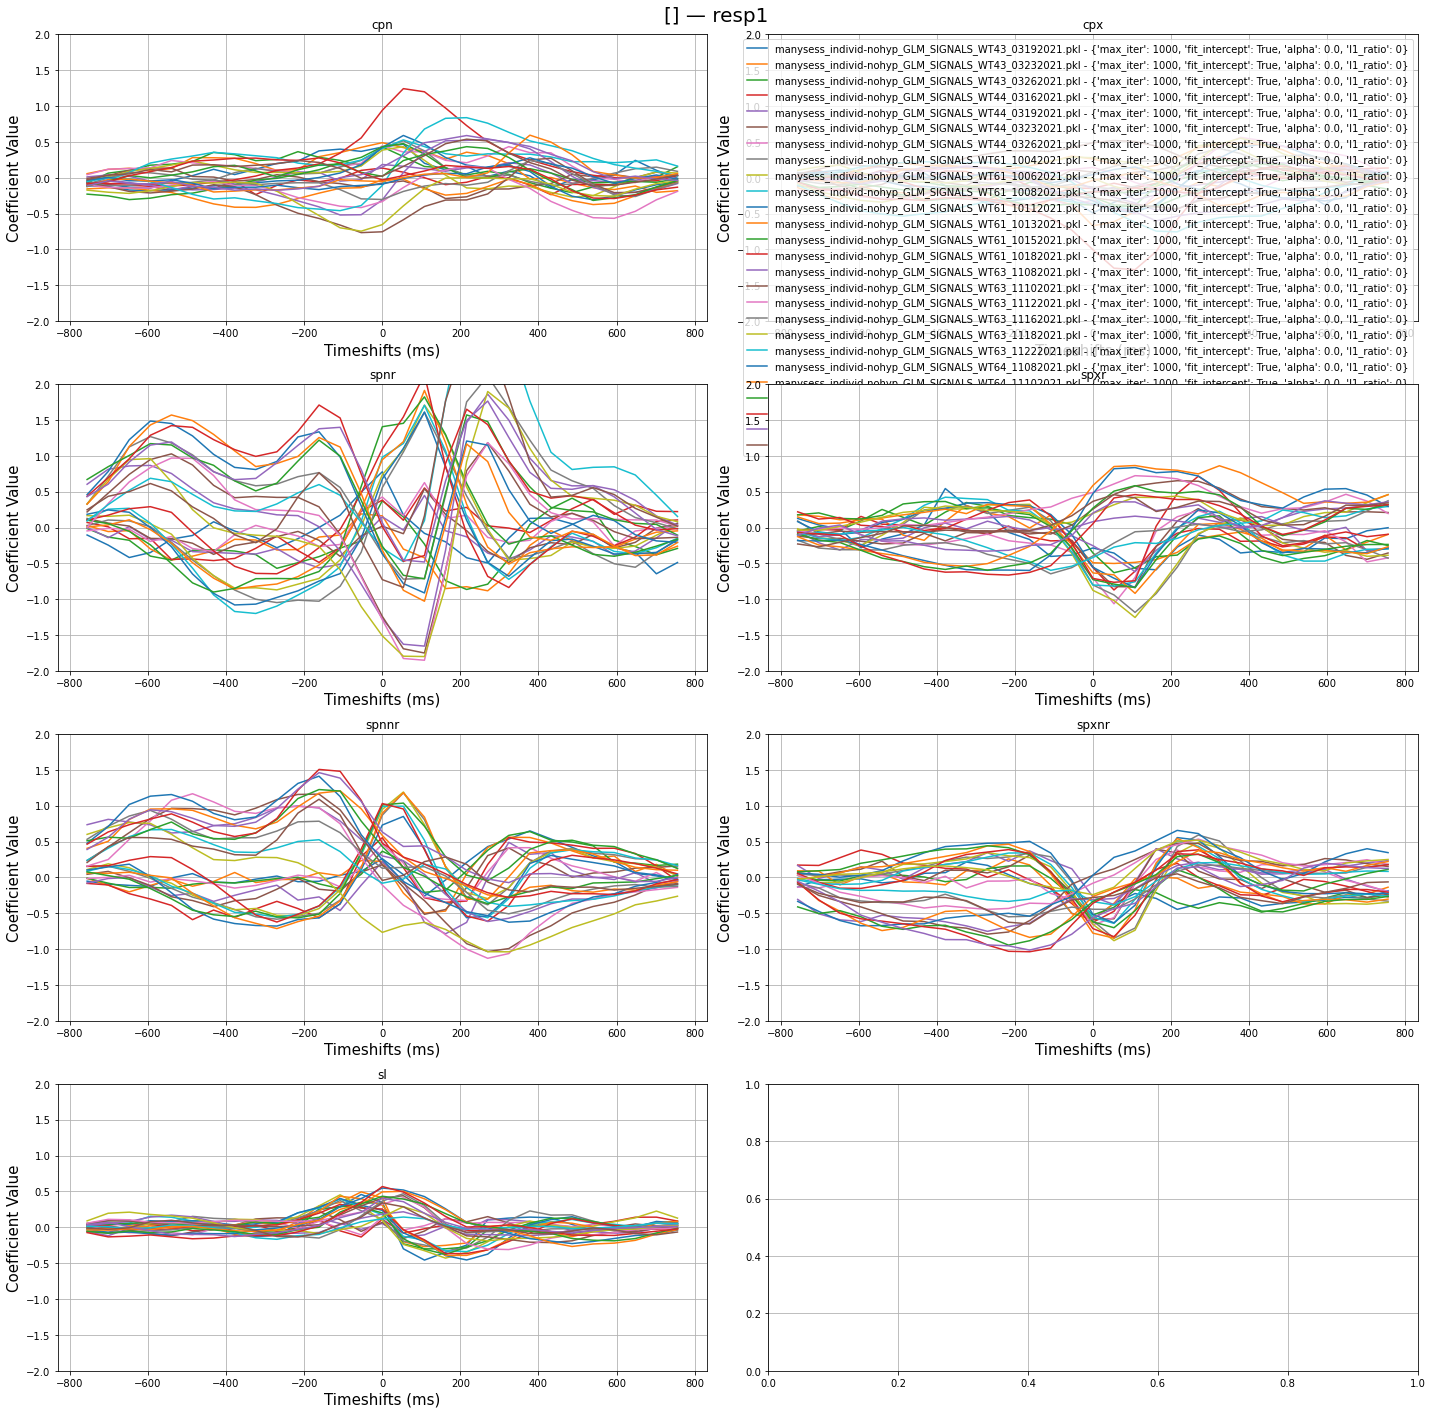

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03232021.pkl - 27 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03262021.pkl - 28 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03162021.pkl - 29 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03192021.pkl - 30 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03232021.pkl - 31 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03262021.pkl - 32 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10042021.pkl - 33 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10062021.pkl - 34 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10082021.pkl - 35 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10112021.pkl - 36 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10132021.pkl - 37 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10152021.pkl - 38 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10182021.pkl - 39 <class 'dict'>

<ipython-input-14-39d0ed1afd6e>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11102021.pkl - 47 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11122021.pkl - 48 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11162021.pkl - 49 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11182021.pkl - 50 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11222021.pkl - 51 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03192021.pkl - 52 <class 'dict'>


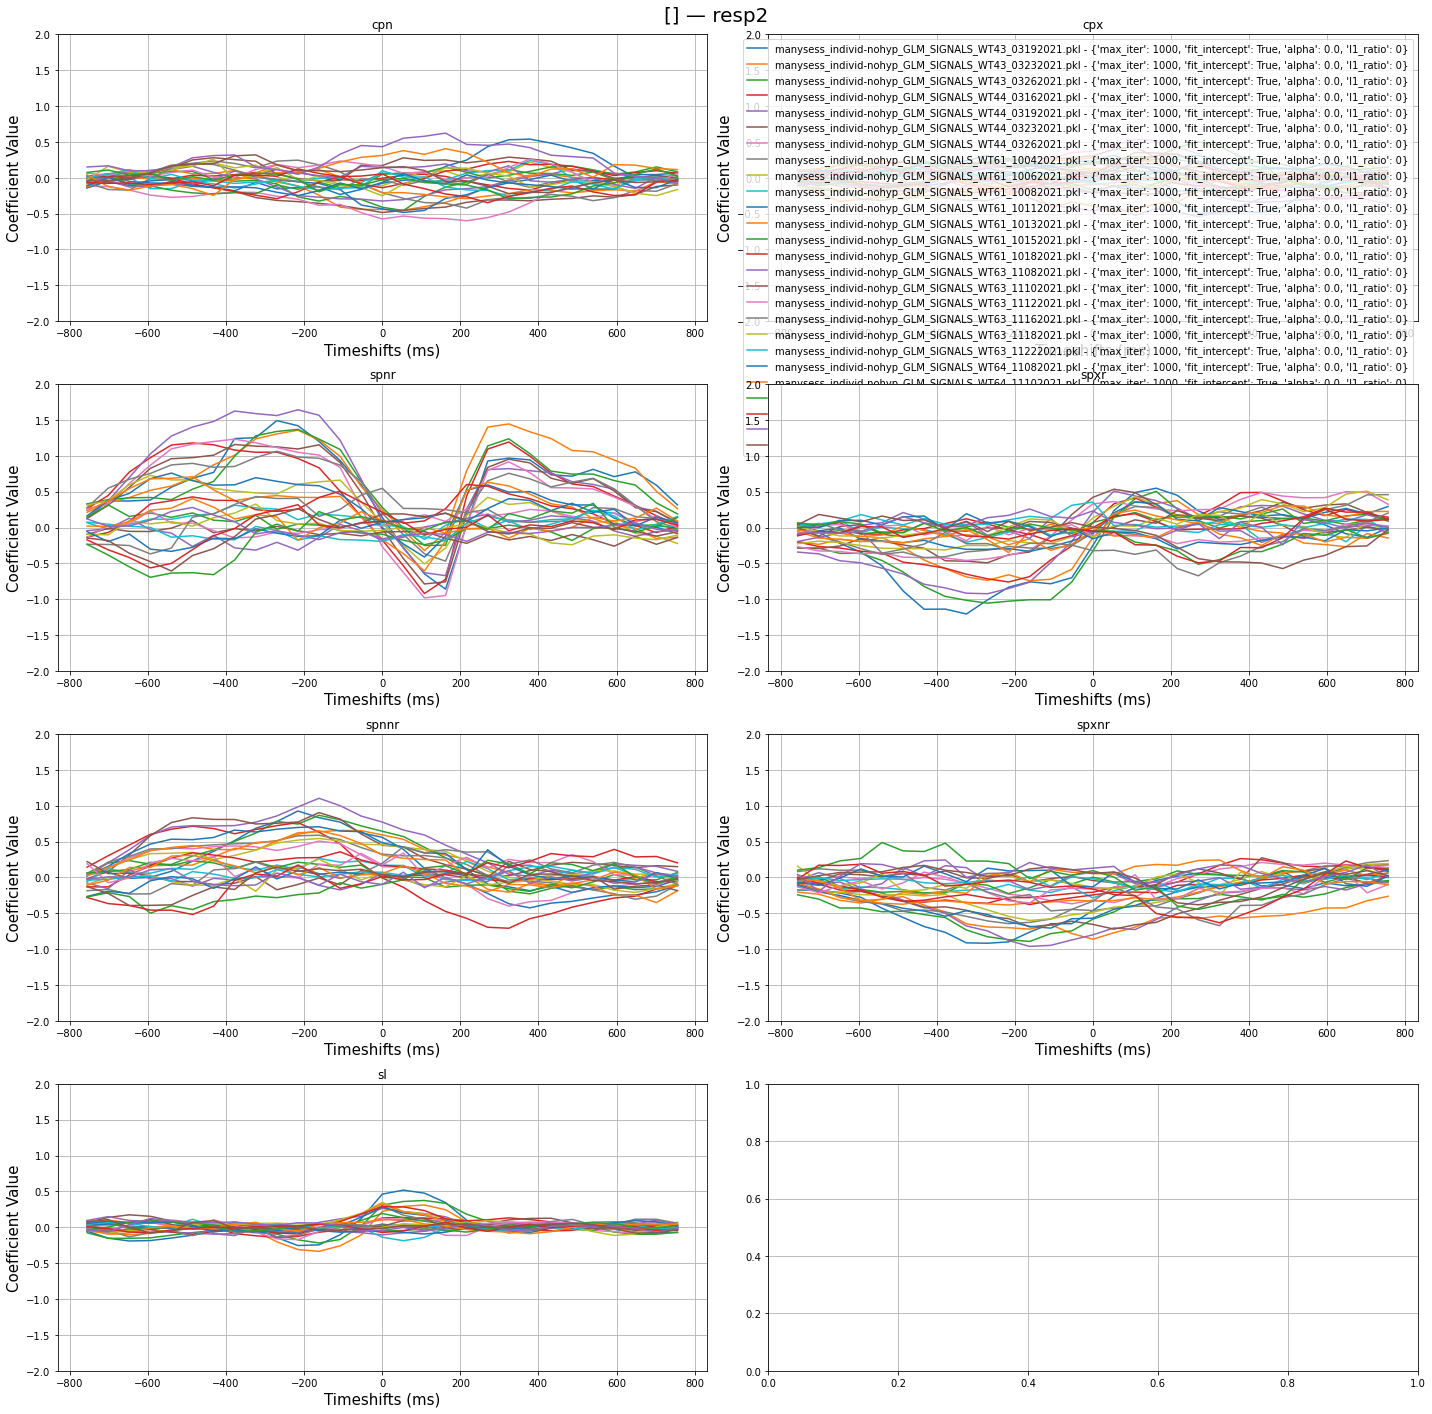

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03232021.pkl - 53 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03262021.pkl - 54 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03162021.pkl - 55 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03192021.pkl - 56 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03232021.pkl - 57 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03262021.pkl - 58 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10042021.pkl - 59 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10062021.pkl - 60 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10082021.pkl - 61 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10112021.pkl - 62 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10132021.pkl - 63 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10152021.pkl - 64 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10182021.pkl - 65 <class 'dict'>

<ipython-input-14-39d0ed1afd6e>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11162021.pkl - 75 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11182021.pkl - 76 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11222021.pkl - 77 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03192021.pkl - 78 <class 'dict'>


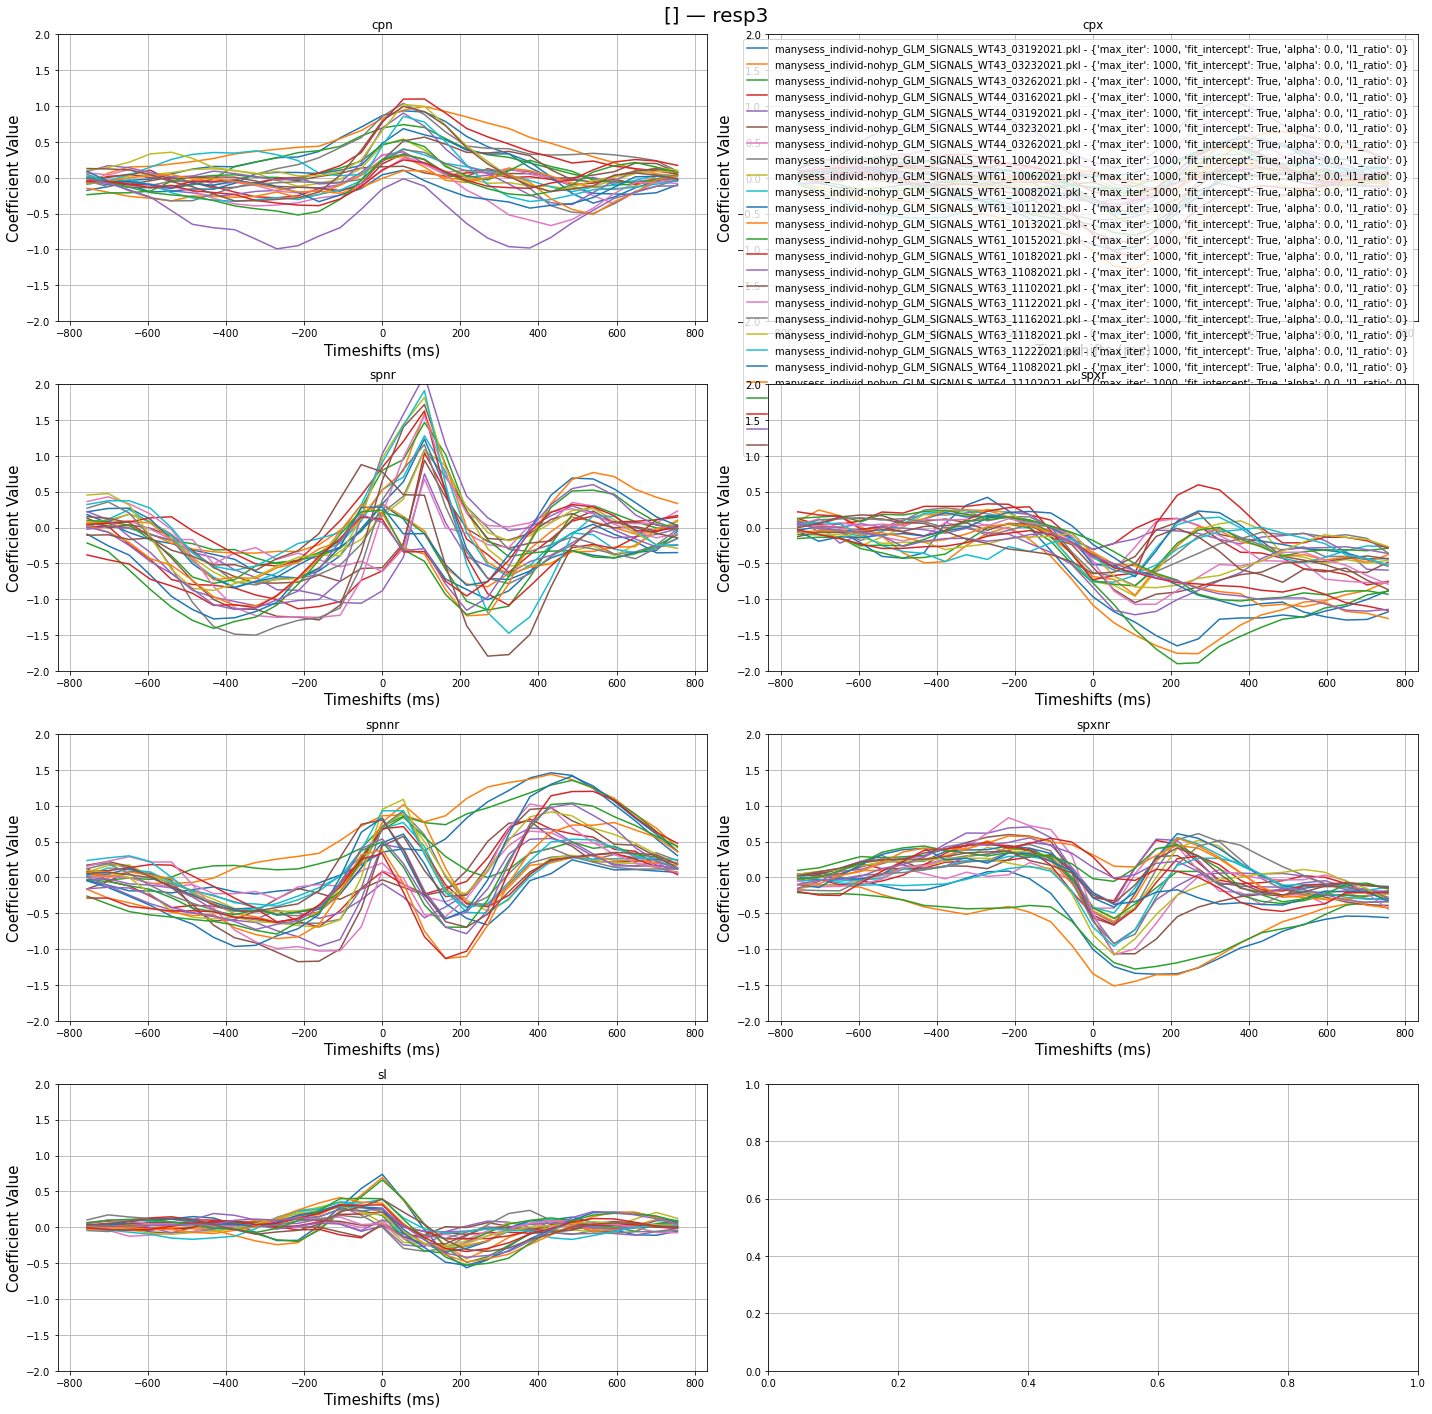

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03232021.pkl - 79 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT43_03262021.pkl - 80 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03162021.pkl - 81 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03192021.pkl - 82 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03232021.pkl - 83 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT44_03262021.pkl - 84 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10042021.pkl - 85 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10062021.pkl - 86 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10082021.pkl - 87 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10112021.pkl - 88 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10132021.pkl - 89 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10152021.pkl - 90 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT61_10182021.pkl - 91 <class 'dict'>

<ipython-input-14-39d0ed1afd6e>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11102021.pkl - 99 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11122021.pkl - 100 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11162021.pkl - 101 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11182021.pkl - 102 <class 'dict'>
fn: manysess_individ-nohyp_GLM_SIGNALS_WT64_11222021.pkl - 103 <class 'dict'>


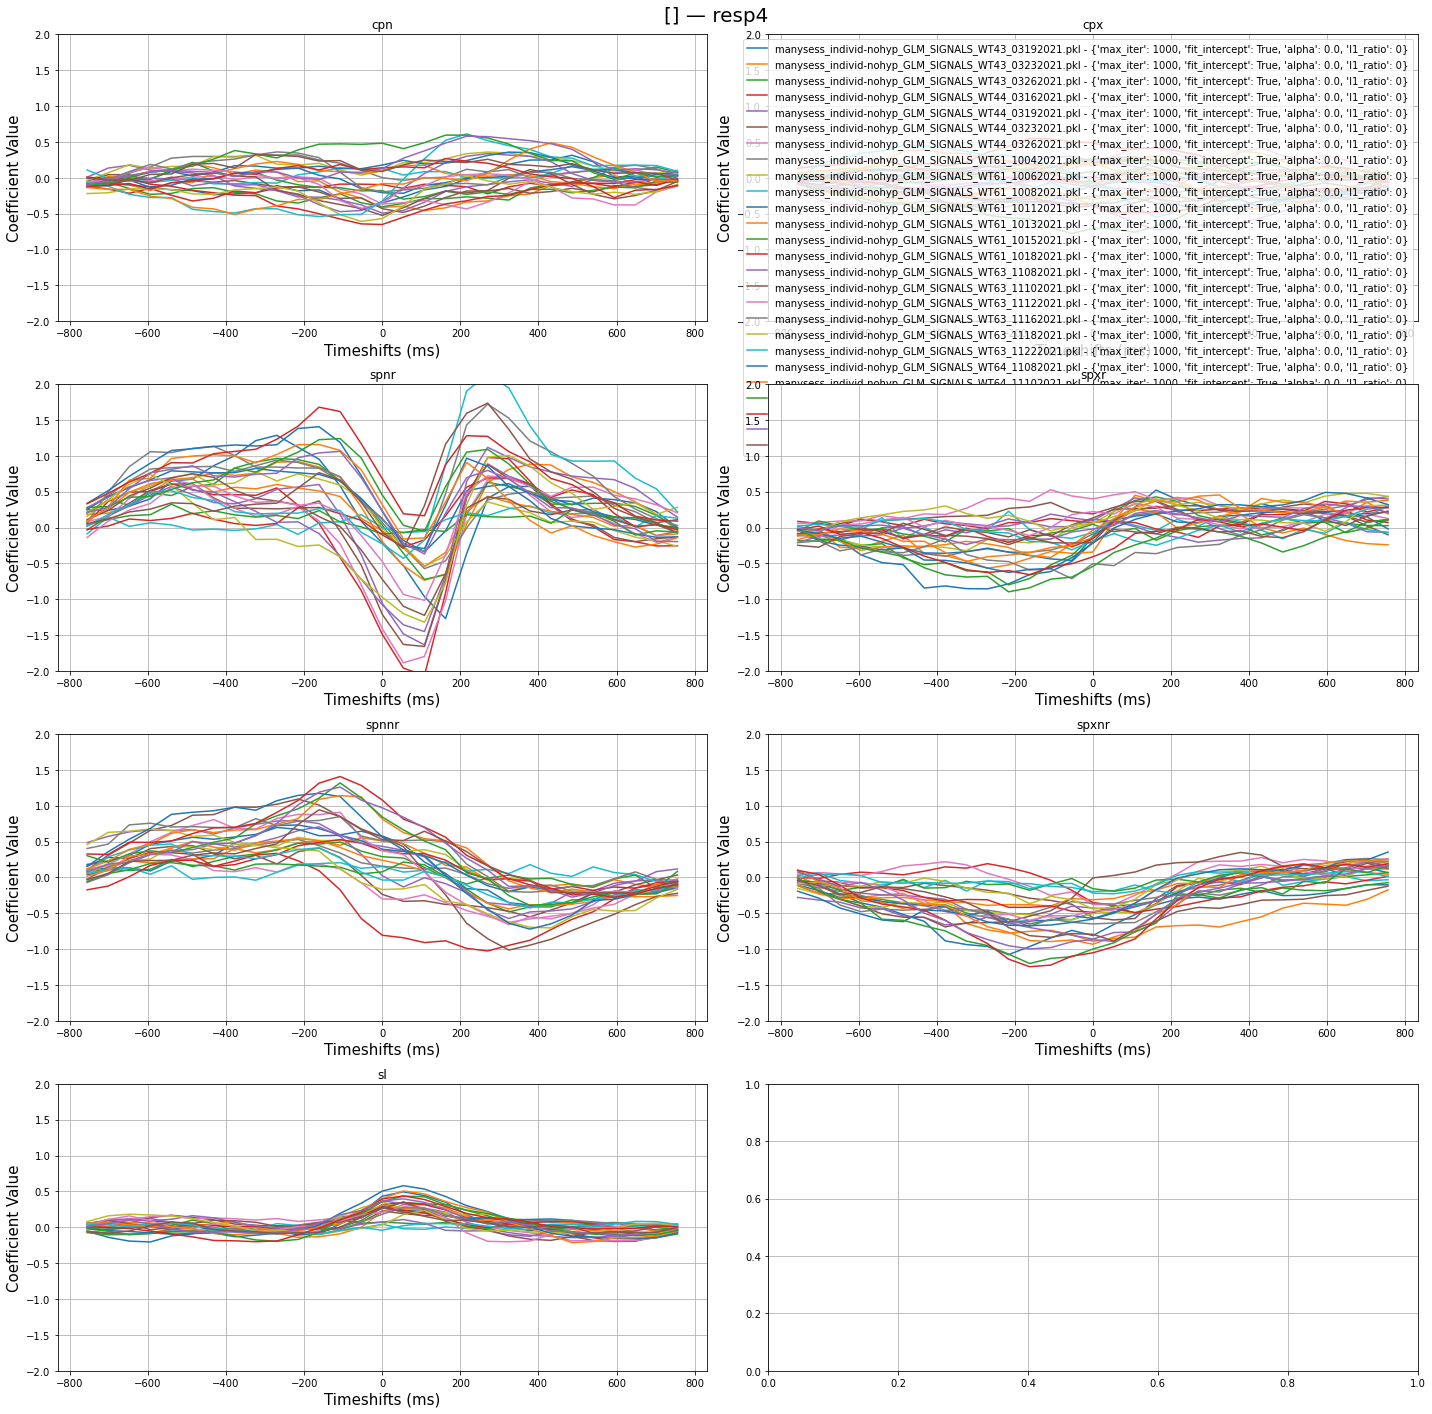

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:

prv_res = None

# for fit_res in fit_res_lst:

    # print(type(fit_res))
for ifr, fr in enumerate(fit_res_lst):
    
    fn = fr[0]
    fr = fr[1]
    
    print('fn:', fn, '-', ifr, type(fr))

    dc = fr['dropped_cols']
    rc = fr['response_col']
    hp = fr['hyperparams']


    if len(dc) > 0 and dc[0] == 'nTrial':
        continue
    if hp['l1_ratio'] > 0.0:
        continue
    # if hp['l1_ratio'] != 0:
    #     continue

    plt.figure()
    glm = fr['glm_model_gss']
    X_cols_plot = gdat.data['X_cols']
    X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
    X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
    X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
    X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

    # print(len(fr['dropped_cols']))
    # print(len(X_cols_plot))
    # print(len(X_cols_sftd_plot))

    bounds = (-2.0, 2.0)

    if prv_res != rc:
        if prv_res is not None:
            axs[0,1].legend()
            for ax in axs.reshape(-1):
                ax.grid(True)
            plt.show()
        
        fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            # y_lims=(-2.0, 2.0),
                            y_lims=bounds,
                            # filename=f'{fn}_coeffs.png',
                            binsize=54,
                            plot_name=f'{dc} — {rc}',
                            # label='Mean Coefficients'
                            label=f'{fn} - {hp}'
                            )
    else:
        splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            y_lims=bounds,
                            binsize=54,
                            plot_name=f'{dc} — {rc}',
                            fig=fig,
                            axs=axs,
                            label=f'{fn} - {hp}'
                            )
    prv_res = rc


axs[0,1].legend()
for ax in axs.reshape(-1):
    ax.grid(True)
plt.show()

plt.close('all')


# Try an alpha of 100
# Compare the proportional compression of L1/L2 regularization
# 1. Increase the richness of hte model to fit better
# 2. Start running analyses across all sessions for the animal
# 3. Take regression -- only on all channels

In [15]:
# Summary for the mouse
# 1. Chase down the regularization parameters
# Pool data across sessions and explore regularization
# Continue doing session by session and add regularization there
# 
# Conatenate all of the data and fit a simple OLS

# 2. Do the leave out analysis

In [16]:
exmn = [_ for _ in fit_res_lst if 'r_concat_GLM_SIGNALS_WT63_11222021' in _[0]]

In [17]:
[_[2].data.keys() for _ in exmn]

[]

In [18]:

# [_[1].keys() for _ in exmn]
[(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1).iloc[20400:20500].plot()

IndexError: list index out of range

In [ ]:
f = [(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1).sum(axis=1)
f2 = [(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1).iloc[:, [3, 5]].sum(axis=1)
[(_[2].data['X_cols'], _[2].data['basedata'][_[2].data['X_cols']]) for _ in exmn][0][1].drop('nTrial', axis=1)[(f == 2)&(f2 == 2)].query('cpn == 0')

In [ ]:
sglm_val = [gdat_dct[k] for k in gdat_dct if '11222021' in k][0]
sglm_val.data['basedata'][['rpn', 'lpn', 'rl', 'll', 'r', 'nr', 'r_trial', 'nr_trial']].iloc[20400:20450].plot()
(sglm_val.data['basedata'][['rpnnr']].iloc[20400:20450]*2).plot()
# (sglm_val.data['basedata'][['spn', 'spnr', 'spnnr']].iloc[20400:20450]*2).plot()
# (sglm_val.data['basedata'][['spn', 'spnr', 'spnnr']].iloc[20400:20450]*2).plot()


In [ ]:
# exmn = [_ for _ in fit_res_lst if 'new_lynne_mn2l2_only_refac_GLM_SIGNALS_WT63_11082021' in _[0]]
# exmn = [_ for _ in fit_res_lst if 'new_lynne_mn2l2_only_refac_GLM_SIGNALS_WT63_11162021' in _[0]]
# exmn = [_ for _ in fit_res_lst if 'new_lynne_mn2l2_only_refac_GLM_SIGNALS_WT63_11182021' in _[0]]
exmn = [_ for _ in fit_res_lst if 'r_concat_GLM_SIGNALS_WT63_11222021' in _[0]]


In [ ]:
exmn

In [ ]:
# X_cols_plot = [_[2].data['X_cols'] for _ in exmn][0]
# X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
# X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
# X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
# X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

num_coef = 6
print([_[2].data['X_cols'][1:] for _ in exmn][0][num_coef])

plt.plot([[__ for __i, __ in enumerate(_[1]['glm_model_gss'].coef_) if __i%7 == num_coef] for _ in exmn][0])

# [_[1]['glm_model_gss'].coef_ for _ in exmn]


In [ ]:
resp1 = exmn[4][2].data['basedata']['resp1']
resp1.mean(), resp1.std()

In [ ]:
exmn[4][2].data['basedata']['resp1'].plot()

In [ ]:
exmn[4][2].data['basedata']['resp1'].plot()

In [ ]:
# import matplotlib.pyplot as plt

# fit_res = [_ for _ in gdat.data['fit_results']]
# prv_res = None

# # fit_res_lst = [[_ for _ in gdat.data['fit_results']] for gdat in gdat_lst]
# # prv_res = None

# # for fit_res in fit_res_lst:
#     for ifr, fr in enumerate(fit_res):
#         dc = fr['dropped_cols']
#         rc = fr['response_col']
#         hp = fr['hyperparams']

#         if len(dc) > 0 and dc[0] == 'nTrial':
#             continue
#         if hp['l1_ratio'] > 0.01:
#             continue

#         plt.figure()
#         glm = fr['glm_model_gss']
#         X_cols_plot = gdat.data['X_cols']
#         X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
#         X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
#         X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
#         X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

#         # print(len(fr['dropped_cols']))
#         # print(len(X_cols_plot))
#         # print(len(X_cols_sftd_plot))

#         if prv_res != rc:
#             if prv_res is not None:
#                 axs[0,1].legend()
#                 for ax in axs.reshape(-1):
#                     ax.grid()
#                 plt.show()
            
#             fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
#                                 X_cols_sftd_plot,
#                                 plot_width=2,
#                                 y_lims=(-2.0, 2.0),
#                                 # filename=f'{fn}_coeffs.png',
#                                 binsize=50,
#                                 plot_name=f'{dc} — {rc}',
#                                 # label='Mean Coefficients'
#                                 label=f'{hp}'
#                                 )
#         else:
#             splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
#                                 X_cols_sftd_plot,
#                                 plot_width=2,
#                                 y_lims=(-2.0, 2.0),
#                                 binsize=50,
#                                 plot_name=f'{dc} — {rc}',
#                                 fig=fig,
#                                 axs=axs,
#                                 label=f'{hp}'
#                                 )
#         prv_res = rc


#     axs[0,1].legend()
#     for ax in axs.reshape(-1):
#         ax.grid()
#     plt.show()

#     plt.close('all')

In [ ]:

# sys.path.append(f'./sabatinilab-glm/backend')
# sys.path.append(f'./..')
# sys.path.append(f'./backend')
# sys.path.append(f'./../backend')
# import sglm_plt as splt
# # fig, axs = splt.plot_all_beta_coefs(mean_coeffs, X_cols_plot,
# #                         X_cols_sftd_plot,
# #                         plot_width=2,
# #                         y_lims=(-0.5, 0.5),
# #                         # filename=f'{fn}_coeffs.png',
# #                         binsize=50,
# #                         label='Mean Coefficients'
# #                         )

# for icoef, coef in enumerate(coef_lst):

#     splt.plot_all_beta_coefs(coef_lst[icoef], X_cols_plot,
#                             X_cols_sftd_plot,
#                             plot_width=2,
#                             y_lims=(-0.6, 0.6),
#                             # filename=f'{fn}_coeffs.png',
#                             binsize=50,
#                             fig=fig,
#                             axs=axs,
#                             label=f'Session {icoef+1} — {coef_fn_lst[icoef]}'
#                             )

# for ax in axs.reshape(-1):
#     ax.grid()

# axs[0, 0].legend()
# # break


In [ ]:
# import matplotlib.pyplot as plt
# # for x_val in ['alpha', 'l1_ratio']:
# #     plt.figure()
# #     plt.scatter(df[x_val], df['holdout_witi'], alpha=0.2)
# #     plt.scatter(df[x_val], df['holdout_noiti'], alpha=0.2)
# #     plt.scatter(df[x_val], df['gss_witi'], alpha=0.2)
# #     plt.title(x_val)

# for q in ['zsgdFF', 'zsrdFF']:
#     dfq = df.query(f"response == '{q}'")
#     for x_val in ['alpha', 'l1_ratio']:
#         for y_val in ['alpha', 'l1_ratio']:
#             if x_val == y_val:
#                 continue
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['holdout_witi'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'holdout_witi')
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['holdout_noiti'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'holdout_noiti')
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['gss_witi'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'gss_witi')


In [ ]:
# for x_val in ['alpha', 'l1_ratio']:
#     plt.figure()
#     plt.scatter(df[x_val], df['holdout_witi'], alpha=0.2)
#     plt.scatter(df[x_val], df['holdout_noiti'], alpha=0.2)
#     plt.scatter(df[x_val], df['gss_witi'], alpha=0.2)
#     plt.title(x_val)

In [ ]:
# [(_['glm_model_gss'].coef_, _['glm_model_gss'].intercept_) for _ in gdat.data['fit_results']]